[![gammapy](https://img.shields.io/badge/powered%20by-gammapy-orange.svg?style=flat)](https://gammapy.org/)

# Gammapy Part II: Catalog Source and ROI Analysis
**Tutors:** Rubens Costa Jr and M Felipe Sousa.

This hands-on tutorial gives an introduction to how to access and explore the most common gamma-ray source catalogs. `catalog` provides convenient access to common gamma-ray source catalogs. Typically, we use it to compare new analyses against catalog results, e.g. overplot the spectral model, or compare the source position. In this tutorial, we will also show the analysis of a region of interest (ROI) by selecting sources from a set of conditions and region.



## Preface
We recommend to follow this tutorial by **executing the code cells on your local machine**, along with the tutor. 


We're happy to receive any **feedback or questions** on the tutorial via mail to *rubensjrcosta@gmail.com* or *manoelfelipesousa@gmail.com*.


<a id='intro'></a>
## Indice

* [**1. Source catalogs**](#scatalogs)
  * We will show how to load source catalogs with Gammapy and explore the data using the following classes:
    - `~gammapy.catalog.SourceCatalog`, specifically `~gammapy.catalog.SourceCatalog3FHL`
    - [astropy.table.Table](http://docs.astropy.org/en/stable/api/astropy.table.Table.html)

* [**2. Select a catalog subset**](#catalsubset)
  * We will show how to create a new catalog as a subset of the main catalog that verify a set of conditions:
    - catalog subset of the brightest sources in the 100 to 200 GeV energy band.
    - catalog subset within a region of interest.



<a id='setup'></a>
🔝 [Back to Top](#intro)<br>
##  Setup

In [ ]:
!pip install gammapy

In [ ]:
from gammapy.utils.check import check_tutorials_setup

check_tutorials_setup()

In [ ]:
import os # Miscellaneous operating system interfaces
os.environ['GAMMAPY_DATA'] = os.path.join(os.getcwd(), '/content/gammapy-data/1.2')

In [11]:
%matplotlib inline
import numpy as np

import matplotlib.pyplot as plt
from IPython.display import display

import astropy.units as u 
from astropy.coordinates import SkyCoord 

from gammapy.catalog import CATALOG_REGISTRY
from gammapy.maps import Map

___

<a id='scatalogs'></a>
🔝 [Back to Top](#intro)<br>
## 1. Source catalogs

Gammapy provides a convenient interface to access and work with catalog based data.

In this section we will learn how to:

* Load builtins catalogs from `~gammapy.catalog`
* Sort and index the underlying Astropy tables
* Access data from individual sources

`catalog` contains a catalog registry `CATALOG_REGISTRY`, which maps catalog names (e.g. “3fhl”) to catalog classes (e.g. `SourceCatalog3FHL`).

In [2]:
print(CATALOG_REGISTRY)

Registry
--------

SourceCatalogGammaCat: gamma-cat 
SourceCatalogHGPS    : hgps 
SourceCatalog2HWC    : 2hwc 
SourceCatalog3FGL    : 3fgl 
SourceCatalog4FGL    : 4fgl 
SourceCatalog2FHL    : 2fhl 
SourceCatalog3FHL    : 3fhl 
SourceCatalog3HWC    : 3hwc 



Let's start with importing the 3FHL catalog object from the `~gammapy.catalog` submodule:

In [6]:
from gammapy.catalog import SourceCatalog3FHL

First we initialize the Fermi-LAT 3FHL catalog and directly take a look at the `.table` attribute:

<a id='table2'></a>

In [7]:
# fermi_3fhl = SourceCatalog3FHL("$GAMMAPY_DATA/catalogs/fermi/gll_psch_v13.fit.gz")
fermi_3fhl = SourceCatalog3FHL()
fermi_3fhl.table

Source_Name,RAJ2000,DEJ2000,GLON,GLAT,Conf_95_SemiMajor,Conf_95_SemiMinor,Conf_95_PosAng,ROI_num,Signif_Avg,Pivot_Energy,Flux_Density,Unc_Flux_Density,Flux,Unc_Flux,Energy_Flux,Unc_Energy_Flux,Signif_Curve,SpectrumType,Spectral_Index,Unc_Spectral_Index,beta,Unc_beta,PowerLaw_Index,Unc_PowerLaw_Index,Flux_Band,Unc_Flux_Band,nuFnu,Sqrt_TS_Band,Npred,HEP_Energy,HEP_Prob,Variability_BayesBlocks,Extended_Source_Name,ASSOC_GAM,TEVCAT_FLAG,ASSOC_TEV,CLASS,ASSOC1,ASSOC2,ASSOC_PROB_BAY,ASSOC_PROB_LR,Redshift,NuPeak_obs
,deg,deg,deg,deg,deg,deg,deg,,,GeV,1 / (GeV s cm2),1 / (GeV s cm2),1 / (s cm2),1 / (s cm2),erg / (s cm2),erg / (s cm2),,,,,,,,,1 / (s cm2),1 / (s cm2),erg / (s cm2),,,GeV,,,,,,,,,,,,,Hz
bytes18,float32,float32,float32,float32,float32,float32,float32,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,bytes11,float32,float32,float32,float32,float32,float32,float32[5],"float32[5,2]",float32[5],float32[5],float32,float32,float32,int16,bytes18,bytes18,bytes1,bytes21,bytes7,bytes26,bytes26,float32,float32,float32,float32
3FHL J0001.2-0748,0.3107,-7.8075,89.0094,-67.3118,0.0424,0.0424,--,64,5.362,23.73,5.3174e-13,2.0975e-13,2.9593e-11,1.1704e-11,1.6752e-12,1.0743e-12,1.02,PowerLaw,1.6724,0.8274,0.5916,0.7129,2.2226,0.4808,1.1127661e-11 .. 1.1422301e-22,-6.0763976e-12 .. 6.529277e-12,3.533989e-13 .. 1.1789072e-22,3.1458344 .. 0.0,7.63,86.975,0.9964,1,,3FGL J0001.2-0748,N,,bll,PMN J0001-0746,,0.9974,0.9721,--,306196370000000.0
3FHL J0001.9-4155,0.4849,-41.9303,334.1216,-72.0697,0.1018,0.1018,--,429,5.638,28.42,5.4253e-13,1.6839e-13,4.3230e-11,1.3428e-11,3.4900e-12,1.8276e-12,0.45,PowerLaw,1.7819,0.4941,0.1187,0.2798,1.9418,0.3100,2.1003905e-11 .. 1.9287885e-18,-8.032091e-12 .. 5.8594097e-12,6.7452245e-13 .. 2.078675e-18,4.899907 .. 0.0,12.51,266.625,0.9622,1,,3FGL J0002.2-4152,N,,bcu,1RXS J000135.5-415519,,0.9960,0.0000,--,6309576500000000.0
3FHL J0002.1-6728,0.5283,-67.4825,310.0868,-48.9549,0.0357,0.0357,--,386,8.470,20.82,1.2062e-12,3.2106e-13,5.0093e-11,1.3349e-11,2.3058e-12,9.5580e-13,1.53,PowerLaw,1.8109,0.6260,0.7933,0.5956,2.4285,0.3710,2.4550664e-11 .. 1.9009976e-21,-8.634195e-12 .. 4.8021903e-12,7.7340695e-13 .. 1.9026535e-21,5.900217 .. 0.0,17.11,52.152,0.9988,1,,3FGL J0002.0-6722,N,,bcu,SUMSS J000215-672653,,0.0000,0.9395,--,4466832000000000.0
3FHL J0003.3-5248,0.8300,-52.8150,318.9245,-62.7936,0.0425,0.0425,--,145,7.229,23.66,7.5065e-13,2.3102e-13,4.1560e-11,1.2839e-11,2.2874e-12,1.1145e-12,1.70,PowerLaw,1.6010,0.5644,0.9972,0.1721,2.2481,0.3732,2.0886386e-11 .. 7.5867555e-23,-8.143967e-12 .. 5.31299e-12,6.6265456e-13 .. 7.800202e-23,5.298393 .. 0.0,13.02,67.310,0.9636,1,,3FGL J0003.2-5246,N,,bcu,RBS 0006,,0.9996,0.9716,--,7.079464e+16
3FHL J0007.0+7303,1.7647,73.0560,119.6625,10.4666,0.0101,0.0101,--,277,75.265,12.80,1.7436e-10,7.5950e-12,1.5308e-09,6.1341e-11,3.6785e-11,1.5973e-12,3.24,LogParabola,3.1751,0.2103,0.9021,0.2659,3.8315,0.1141,1.3514667e-09 .. 3.839895e-18,-5.7581186e-11 .. 4.060418e-12,4.109739e-11 .. 2.9231144e-18,71.33829 .. 0.0,654.15,60.292,0.9972,1,,3FGL J0007.0+7302,E,CTA 1,PSR,LAT PSR J0007+7303,,1.0000,0.0000,--,--
3FHL J0007.9+4711,1.9931,47.1920,115.3093,-15.0354,0.0196,0.0196,--,302,17.774,17.19,5.9778e-12,8.7683e-13,1.5131e-10,2.2181e-11,5.1444e-12,1.0540e-12,0.56,PowerLaw,2.6783,0.4196,0.1696,0.3282,2.8588,0.2685,1.0582407e-10 .. 1.9819723e-16,-1.7538379e-11 .. 4.823511e-12,3.278615e-12 .. 1.8668298e-16,15.209969 .. 0.0,50.95,68.152,0.9759,1,,3FGL J0008.0+4713,N,,bll,MG4 J000800+4712,,1.0000,0.9873,0.2800,2511884200000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3FHL J2356.2+4035,359.0746,40.5985,111.7521,-21.0732,0.0298,0.0298,--,312,7.625,29.01,5.2427e-13,1.5104e-13,4.3400e-11,1.2511e-11,3.6677e-12,1.8547e-12,0.35,PowerLaw,2.0233,0.4242,-0.0706,0.1926,1.9095,0.2975,2.5777725e-11 .. 3.110794e-16,-8.514681e-12 .. 5.4134618e-12,8

In [8]:
# fermi_3fhl.table.colnames

Now we can plot the sources on the image created above:

In [12]:
gc_3fhl = Map.read("$GAMMAPY_DATA/fermi-3fhl-gc/fermi-3fhl-gc-counts.fits.gz")
gc_3fhl

WcsNDMap

	geom  : WcsGeom 
 	axes  : ['lon', 'lat']
	shape : (400, 200)
	ndim  : 2
	unit  : 
	dtype : >i8

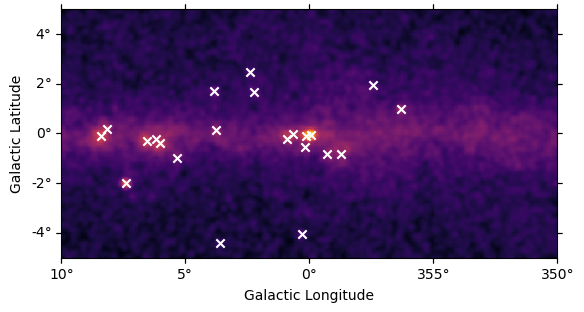

In [13]:
ax =gc_3fhl.smooth("0.1 deg").plot(
    stretch="sqrt", cmap="inferno"
)

positions = fermi_3fhl.positions
ax.scatter(
    positions.data.lon.deg,
    positions.data.lat.deg,
    transform=ax.get_transform("icrs"),
    color="w",
    marker="x"
)

This looks very familiar again. The data is just stored as an [astropy.table.Table](http://docs.astropy.org/en/stable/api/astropy.table.Table.html#astropy.table.Table) object. We have all the methods and attributes of the `Table` object available. E.g. we can sort the underlying table by `Signif_Avg` to find the top 5 most significant sources:



In [14]:
# sort table by significance of the source
fermi_3fhl.table.sort("Signif_Avg")

# invert the order to find the highest values and take the top 5
top_five_TS_3fhl = fermi_3fhl.table[::-1][:5]

# print the top five significant sources with association and source class
top_five_TS_3fhl[["Source_Name", "ASSOC1", "ASSOC2", "CLASS", "Signif_Avg"]]

Source_Name,ASSOC1,ASSOC2,CLASS,Signif_Avg
bytes18,bytes26,bytes26,bytes7,float32
3FHL J0534.5+2201,Crab Nebula,,PWN,168.641
3FHL J1104.4+3812,Mkn 421,,BLL,144.406
3FHL J0835.3-4510,PSR J0835-4510,Vela X field,PSR,138.801
3FHL J0633.9+1746,PSR J0633+1746,,PSR,99.734
3FHL J1555.7+1111,PG 1553+113,,BLL,94.411


If you are interested in the data of an individual source you can access the information from catalog using the name of the source or any alias source name that is defined in the catalog:

In [15]:
mkn_421_3fhl = fermi_3fhl["3FHL J1104.4+3812"]

# or use any alias source name that is defined in the catalog
# mkn_421_3fhl = fermi_3fhl["Mkn 421"]

In [16]:
# type(mkn_421_3fhl)

In [18]:
print(mkn_421_3fhl)


*** Basic info ***

Catalog row index (zero-based) : 1554
Source name          : 3FHL J1104.4+3812
Extended name        :                   
Associations     : Mkn 421, Markarian 421, 3FGL J1104.4+3812
ASSOC_PROB_BAY   : 1.000
ASSOC_PROB_LR    : 1.000
Class            : BLL    
TeVCat flag      : P

*** Other info ***

Significance (10 GeV - 2 TeV)    : 144.406
Npred                            : 1859.6

HEP Energy       : 1726.510 GeV
HEP Probability  : 1.000
Bayesian Blocks  : 5
Redshift         : 0.030
NuPeak_obs       : 1.15e+17 Hz

*** Position info ***

RA                   : 166.121 deg
DEC                  : 38.205 deg
GLON                 : 179.836 deg
GLAT                 : 65.038 deg

Semimajor (95%)      : 0.0084 deg
Semiminor (95%)      : 0.0084 deg
Position angle (95%) : 0.00 deg
ROI number           : 9

*** Spectral fit info ***

Spectrum type                    : LogParabola
Significance curvature           : 3.1
Power-law spectral index         : 1.947 +- 0.025
LogPar

In [19]:
print(mkn_421_3fhl.data["Signif_Avg"])

144.40611


___

<a id='catalsubset'></a>
🔝 [Back to Top](#intro)<br>
## 2. Select a catalog subset

The `catalog` objects support selection using boolean arrays (of the same length), so one can create a new catalog as a subset of the main catalog that verify a set of conditions.

In this section we will learn how to:

* Select a catalog subset from brightest sources in the given energy range
* Select a catalog subset within a region of interest



### Brightest sources

Let's start by selecting only few of the brightest sources in the 100 to 200 GeV energy band.

In [138]:
mask_bright = np.zeros(len(fermi_3fhl.table), dtype=bool)

flux_min = 1e-10 * u.Unit("cm-2 s-1")

for k, source in enumerate(fermi_3fhl):
    flux = source.spectral_model().integral(100 * u.GeV, 200 * u.GeV).to("cm-2 s-1")
    if flux > flux_min:
        mask_bright[k] = True
        print(f"{source.row_index:<7d} {source.name:20s} {flux:.3g}")

1241    3FHL J2028.6+4110e   1.75e-10 1 / (s cm2)
1387    3FHL J1824.5-1351e   1.77e-10 1 / (s cm2)
1394    3FHL J1036.3-5833e   1.57e-10 1 / (s cm2)
1503    3FHL J0851.9-4620e   1.24e-10 1 / (s cm2)
1549    3FHL J1653.8+3945    1.27e-10 1 / (s cm2)
1554    3FHL J1104.4+3812    3.34e-10 1 / (s cm2)
1555    3FHL J0534.5+2201    2.99e-10 1 / (s cm2)


In [39]:
catalog_3fhl_bright = fermi_3fhl[mask_bright]
print(catalog_3fhl_bright)

SourceCatalog3FHL:
    name: 3fhl
    description: LAT third high-energy source catalog
    sources: 7



In [40]:
print(catalog_3fhl_bright.table["Source_Name"])

   Source_Name    
------------------
3FHL J2028.6+4110e
3FHL J1824.5-1351e
3FHL J1036.3-5833e
3FHL J0851.9-4620e
3FHL J1653.8+3945 
3FHL J1104.4+3812 
3FHL J0534.5+2201 


### Region of Interest

Similarly we can select only sources within a region of interest. Here for example we use the position property of the catalog object to select sources within 5 degrees from “PKS 0008-222”:

In [41]:
catalog_4fgl = CATALOG_REGISTRY.get_cls("4fgl")()

In [140]:
source = catalog_4fgl["PKS 0008-222"]

radius_roi = 5 * u.deg
mask_roi = source.position.separation(catalog_4fgl.positions) < radius_roi

catalog_4fgl_roi = catalog_4fgl[mask_roi]
print("Number of sources :", len(catalog_4fgl_roi.table))


Number of sources : 15


In [139]:
# mask_roi

array([False, False, False, ..., False, False, False])

In [60]:
print(catalog_4fgl_roi.table["Source_Name"])

   Source_Name    
------------------
4FGL J0001.8-2153 
4FGL J0003.3-1928 
4FGL J0006.3-1813 
4FGL J0008.4-2339 
4FGL J0010.2-2431 
4FGL J0010.8-2154 
4FGL J0013.9-1854 
4FGL J0021.5-2552 
4FGL J0022.1-1854 
4FGL J0025.0-2320 
4FGL J0025.2-2231 
4FGL J0031.0-2327 
4FGL J2357.7-1937 
4FGL J2358.5-1808 
4FGL J2359.3-2049 


**Source models**

You can create initial source models for your analyses using the `to_models()` method of the catalog objects. Here for example we create a `Models` object from the 4FGL catalog subset

In [45]:
models_4fgl_roi = catalog_4fgl_roi.to_models()
print(models_4fgl_roi)

Models

Component 0: SkyModel

  Name                      : 4FGL J0001.8-2153
  Datasets names            : None
  Spectral model type       : PowerLawSpectralModel
  Spatial  model type       : PointSpatialModel
  Temporal model type       : 
  Parameters:
    index                         :      1.877   +/-    0.17             
    amplitude                     :   4.94e-15   +/- 1.3e-15 1 / (MeV s cm2)
    reference             (frozen):   4429.934       MeV         
    lon_0                         :      0.465   +/-    0.04 deg         
    lat_0                         :    -21.886   +/-    0.05 deg         

Component 1: SkyModel

  Name                      : 4FGL J0003.3-1928
  Datasets names            : None
  Spectral model type       : LogParabolaSpectralModel
  Spatial  model type       : PointSpatialModel
  Temporal model type       : 
  Parameters:
    amplitude                     :   5.61e-13   +/- 5.6e-14 1 / (MeV s cm2)
    reference             (frozen):   1021.7

In [53]:
print(models_4fgl_roi[0])

SkyModel

  Name                      : 4FGL J0001.8-2153
  Datasets names            : None
  Spectral model type       : PowerLawSpectralModel
  Spatial  model type       : PointSpatialModel
  Temporal model type       : 
  Parameters:
    index                         :      1.877   +/-    0.17             
    amplitude                     :   4.94e-15   +/- 1.3e-15 1 / (MeV s cm2)
    reference             (frozen):   4429.934       MeV         
    lon_0                         :      0.465   +/-    0.04 deg         
    lat_0                         :    -21.886   +/-    0.05 deg         




In [59]:
print(models_4fgl_roi[1].spectral_model)

LogParabolaSpectralModel

  type      name     value         unit      ... max frozen is_norm link
-------- --------- ---------- -------------- ... --- ------ ------- ----
spectral amplitude 5.6141e-13 MeV-1 s-1 cm-2 ... nan  False    True     
spectral reference 1.0218e+03            MeV ... nan   True   False     
spectral     alpha 2.1030e+00                ... nan  False   False     
spectral      beta 2.3375e-01                ... nan  False   False     


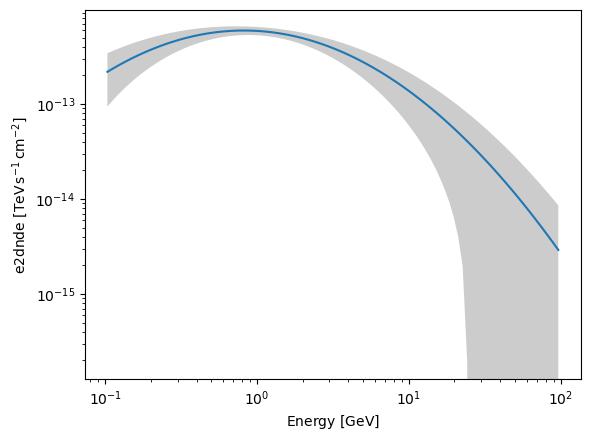

In [58]:
energy_bounds = (100 * u.MeV, 100 * u.GeV)
opts = dict(sed_type="e2dnde", yunits=u.Unit("TeV cm-2 s-1"))
models_4fgl_roi[1].spectral_model.plot(energy_bounds, **opts)
models_4fgl_roi[1].spectral_model.plot_error(energy_bounds, **opts)
plt.show()

**Flux points**

The flux points are available via the flux_points property as a FluxPoints object.



In [ ]:
source = catalog_4fgl_roi[0]
flux_points = source.flux_points

print(flux_points)

In [112]:
display(flux_points.to_table(sed_type="flux"))

# display(flux_points.to_table(sed_type="e2dnde"))

e_ref,e_min,e_max,flux,flux_errp,flux_errn,flux_ul,sqrt_ts,is_ul
MeV,MeV,MeV,1 / (s cm2),1 / (s cm2),1 / (s cm2),1 / (s cm2),,
float64,float64,float64,float64,float64,float64,float64,float32,bool
70.71067811865471,49.99999999999999,99.99999999999994,1.1492211626773496e-08,6.979040900745304e-09,nan,2.5450294316442523e-08,0.5198384,True
173.2050807568876,99.99999999999994,299.99999999999994,3.789410563115325e-09,1.3209864313523667e-09,1.4285730376428774e-09,nan,2.3823957,False
547.7225575051659,299.99999999999994,999.9999999999999,7.879570329549779e-10,1.779470876206446e-10,1.708132385536132e-10,nan,5.093092,False
1732.0508075688763,999.9999999999999,2999.9999999999977,2.0503336528587823e-10,3.759542330228349e-11,3.579090149252728e-11,nan,7.856549,False
5477.225575051656,2999.9999999999977,9999.99999999999,8.072086055133099e-11,1.7526220058572406e-11,1.565760195110233e-11,nan,9.174148,False
17320.508075688766,9999.99999999999,30000.00000000001,3.185368635527652e-11,9.580464893632623e-12,8.638117131309908e-12,nan,7.6847982,False
54772.255750516626,30000.00000000001,100000.00000000003,1.435029178820102e-11,6.414606259358413e-12,4.969809720006824e-12,nan,6.5663548,False
316227.76601683814,100000.00000000003,999999.9999999995,2.6390039920042366e-15,3.4712339339743048e-12,nan,6.945106816036439e-12,0.0,True


In [107]:
from gammapy.datasets import FluxPointsDataset, Datasets

datasets = Datasets()

for source in catalog_4fgl_roi:
    dataset = FluxPointsDataset(data=source.flux_points, models=source.sky_model(), name=source.name)
    datasets.append(dataset)


In [ ]:
print(datasets)

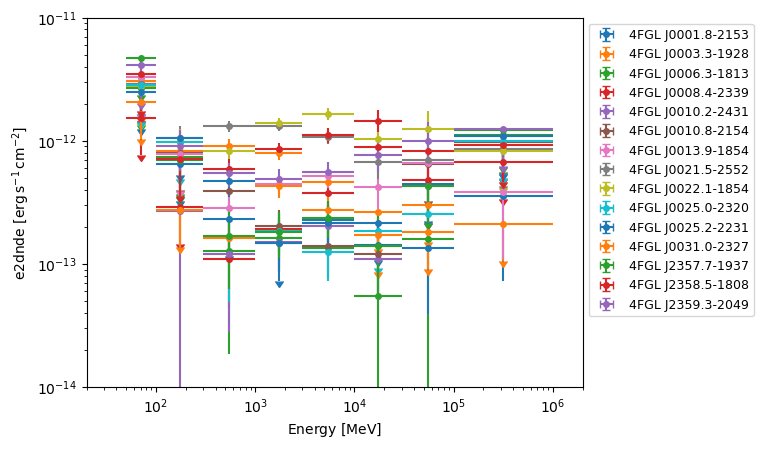

In [137]:
ax = plt.subplot()
ax.yaxis.set_units(u.Unit("erg cm-2 s-1"))

kwargs = {"ax": ax, "sed_type": "e2dnde"}

for d in datasets:
    d.data.plot(label=d.name, **kwargs)

energy_bounds = [2e1, 2e6] * u.MeV
ax.set_ylim(1e-14, 1e-11)
ax.set_xlim(energy_bounds)
ax.legend(fontsize=9, bbox_to_anchor=(1, 1))
plt.show()

____

🔝 [Back to Top](#intro)<br>

## References
<a name="cite_note-1"></a>1. [](#cite_ref-1) Cicerone: Data — LAT Data Files - Column Descriptions. Retrieved [November 5, 2022] from https://fermi.gsfc.nasa.gov/ssc/data/analysis/documentation/Cicerone/Cicerone_Data/LAT_Data_Columns.html.

<a name="cite_note-2"></a>2. [](#cite_ref-2)M. Ajello et al. [Fermi-LAT Collaboration], TFHL:
The third catalog of hard Fermi-LAT sources, Astrophys.
J. Suppl. 232, no. 2, 18 (2017) doi:10.3847/1538-4365/aa8221
[arXiv:1702.00664v3 [astro-ph.HE]].